https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [3]:
import pandas as pd

In [5]:
path_to_file = 'student_scores.csv'
df = pd.read_csv(path_to_file)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


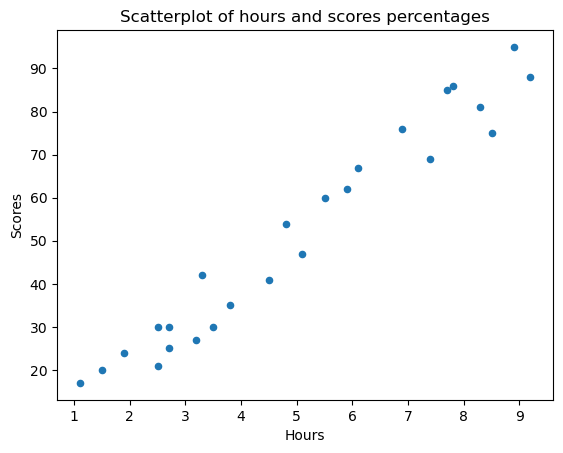

In [7]:
df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages');

As the hours increase, so do the scores. There's a fairly high positive correlation here! Since the shape of the line the points are making appears to be straight - we say that there's a positive linear correlation between the Hours and Scores variables. How correlated are they? The corr() method calculates and displays the correlations between numerical variables in a DataFrame:

In [5]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In this table, Hours and Hours have a 1.0 (100%) correlation, just as Scores have a 100% correlation to Scores, naturally. Any variable will have a 1:1 mapping with itself! However, the correlation between Scores and Hours is 0.97. Anything above 0.8 is considered to be a strong positive correlation.

Having a high linear correlation means that we'll generally be able to tell the value of one feature, based on the other. Even without calculation, you can tell that if someone studies for 5 hours, they'll get around 50% as their score. Since this relationship is really strong - we'll be able to build a simple yet accurate linear regression algorithm to predict the score based on the study time, on this dataset.

When we have a linear relationship between two variables, we will be looking at a line. When there is a linear relationship between three, four, five (or more) variables, we will be looking at an intersecction of planes. In every case, this kind of quality is defined in algebra as linearity.

Pandas also ships with a great helper method for statistical summaries, and we can describe() the dataset to get an idea of the mean, maximum, minimum, etc. values of our columns:

In [6]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


It's expect a 2D input because the LinearRegression() class (more on it later) expects entries that may contain more than a single value (but can also be a single value). In either case - it has to be a 2D array, where each element (hour) is actually a 1-element array:

In [10]:
df['Scores'].values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [12]:
#reshape makes it a 2D array
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

In [14]:
print(df['Hours'].values) # [2.5 5.1 3.2 8.5 3.5 1.5 9.2 ... ]
print(df['Hours'].values.shape) 

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
(25,)


In [42]:
print(X.shape) # (25, 1)
print(X) 

(25, 1)


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [44]:
#split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

The method randomly takes samples respecting the percentage we've defined, but respects the X-y pairs, lest the sampling would totally mix up the relationship. Some common train-test splits are 80/20 and 70/30.

Since the sampling process is inherently random, we will always have different results when running the method. To be able to have the same results, or reproducible results, we can define a constant called SEED that has the value of the meaning of life (42):

In [20]:
#We have our train and test sets ready. Scikit-Learn has a plethora of model types we can easily import and train, LinearRegression being one of them:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [22]:
#Now, we need to fit the line to our data, we will do that by using the .fit() method along with our X_train and y_train data:
regressor.fit(X_train, y_train)

LinearRegression()

If no errors are thrown - the regressor found the best fitting line! The line is defined by our features and the intercept/slope. In fact, we can inspect the intercept and slope by printing the regressor.intecept_ and regressor.coef_ attributes, respectively:

In [24]:
print(regressor.intercept_)
print(regressor.coef_)

[2.82689235]
[[9.68207815]]


In [26]:
#manually using the intercept and coef to predict
def calc(slope, intercept, hours):
    return slope*hours+intercept

score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[[94.80663482]]


In [40]:
# using the model to make predicitons, ssing 9.5 in double brackets to have a 2 dimensional array
score = regressor.predict([[9.5]])
print(score)

[[94.80663482]]


Our result is 94.80663482, or approximately 95%. Now we have a score percentage estimate for each and every hours we can think of. But can we trust those estimates? In the answer to that question is the reason why we split the data into train and test in the first place. Now we can predict using our test data and compare the predicted with our actual results - the ground truth results.

To make predictions on the test data, we pass the X_test values to the predict() method. We can assign the results to the variable y_pred:

In [30]:
y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In [46]:
# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [48]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [50]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 21.93
Mean squared error: 1004.27
Root mean squared error: 31.69


All of our errors are low - and we're missing the actual value by 4.35 at most (lower or higher), which is a pretty small range considering the data we have.

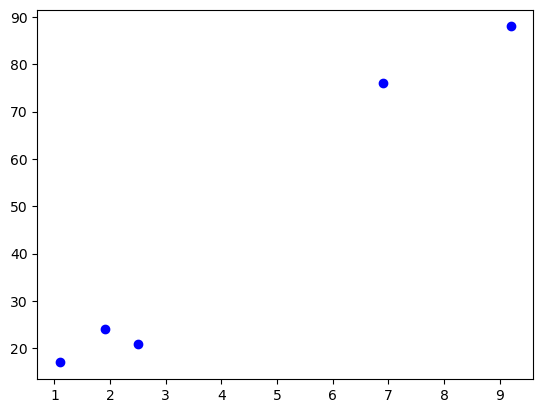

In [54]:
# Exploring our results
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color ='b')

plt.show()

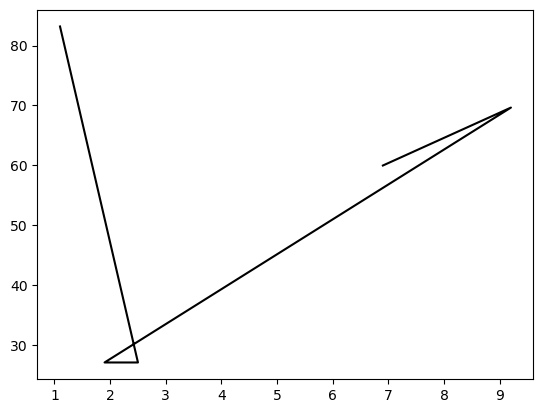

In [56]:
plt.plot(X_test, y_pred, color ='k')

plt.show()

In [26]:
# Using R^2, our model explains 97% of the test data, good model
regressor.score(X_test, y_test)

0.9678055545167994

In [27]:
regressor.score(X_train, y_train)

0.9491209376364416